# Fundamentals of Dynamics programming


## Optimal substructure
https://en.wikipedia.org/wiki/Optimal_substructure
In computer science, a problem is said to have optimal substructure if an optimal solution can be constructed from optimal solutions of its subproblems. This property is used to determine the usefulness of dynamic programming and greedy algorithms for a problem. 

Typically, a greedy algorithm is used to solve a problem with optimal substructure if it can be proven by induction that this is optimal at each step. Otherwise, provided the problem exhibits overlapping subproblems as well, dynamic programming is used. If there are no appropriate greedy algorithms and the problem fails to exhibit overlapping subproblems, often a lengthy but straightforward search of the solution space is the best alternative. **Comments: Difference of greedy algorithm,divide-and-conquer and dynamic programming. How about the CART in decision tree? It belongs to one of them, or to neither.**

In the application of dynamic programming to mathematical optimization, Richard Bellman's Principle of Optimality is based on the idea that in order to solve a dynamic optimization problem from some starting period t to some ending period T, one implicitly has to solve subproblems starting from later dates s, where t<s<T. This is an example of optimal substructure. The Principle of Optimality is used to derive the **Bellman equation**, which shows how the value of the problem starting from t is related to the value of the problem starting from s.



## Dynamic programming vs divide and conquer

Dynamic programming is similar to the divide-and-conquer approach in that the solution of a large problem depends on previously obtained solutions to easier sub-problems. The significant difference, however, is that dynamic programming permits sub-problems to overlap. **By overlap, we mean that the sub-problem can be used in the solution of two different sub-problems**. In contrast, the divide-and-conquer approach creates sub-problems that are completely separate and can be solved independently. 



## When can we apply dynamic programming?
https://en.wikipedia.org/wiki/Dynamic_programming  

There are two key attributes that a problem must have in order for dynamic programming to be applicable:  
* optimal substructure.  
* overlapping sub-problems.  
If a problem can be solved by combining optimal solutions to non-overlapping sub-problems, the strategy is called "divide and conquer" instead. This is why merge sort and quick sort are not classified as dynamic programming problems.  

Optimal substructure means that the solution to a given optimization problem can be obtained by the combination of optimal solutions to its sub-problems. Such optimal substructures are usually described by means of recursion. For example, given a graph G=(V,E), the shortest path p from a vertex u to a vertex v exhibits optimal substructure: take any intermediate vertex w on this shortest path p. If p is truly the shortest path, then it can be split into sub-paths p1 from u to w and p2 from w to v such that these, in turn, are indeed the shortest paths between the corresponding vertices (by the simple cut-and-paste argument described in the book of Introduction to Algorithms). Hence, one can easily formulate the solution for finding shortest paths in a recursive manner, which is what the Bellman–Ford algorithm or the Floyd–Warshall algorithm does.  

Overlapping sub-problems means that the space of sub-problems must be small, that is, any recursive algorithm solving the problem should solve the same sub-problems over and over, rather than generating new sub-problems. For example, consider the recursive formulation for generating the Fibonacci series: Fi = Fi−1 + Fi−2, with base case F1 = F2 = 1. Then F43 = F42 + F41, and F42 = F41 + F40. Now F41 is being solved in the recursive sub-trees of both F43 as well as F42. Even though the total number of sub-problems is actually small (only 43 of them), we end up solving the same problems over and over if we adopt a naive recursive solution such as this. Dynamic programming takes account of this fact and solves each sub-problem only once.

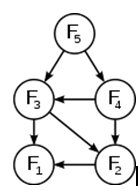

Figure 2. The sub problem graph for the Fibonacci sequence. The fact that **it is not a tree** indicates overlapping sub problems. **Comments: when solving decision tree problems with CART algorithm, it is a tree. So no-overlapping and then not dynamic programming?**
Comments from elsewhere: By overlap, we mean that the sub problem can be used in the solution of two different sub problems. In contrast, the divide-and-conquer approach creates sub problems that are completely separate and can be solved independently.

## Typical implementations
* Top-down approach: This is the direct fall-out of the recursive formulation of any problem. If the solution to any problem can be formulated recursively using the solution to its sub-problems, and if its sub-problems are overlapping, then one can easily memoize or store the solutions to the sub-problems in a table. Whenever we attempt to solve a new sub-problem, we first check the table to see if it is already solved. If a solution has been recorded, we can use it directly, otherwise we solve the sub-problem and add its solution to the table.
* Bottom-up approach: Once we formulate the solution to a problem recursively as in terms of its sub-problems, we can try reformulating the problem in a bottom-up fashion: try solving the sub-problems first and use their solutions to build-on and arrive at solutions to bigger sub-problems. This is also usually done in a tabular form by iteratively generating solutions to bigger and bigger sub-problems by using the solutions to small sub-problems. For example, if we already know the values of F41 and F40, we can directly calculate the value of F42. My comments: This is because all recursive approach can be implemented by iterative method.  

# Recursion and dynamic programming
https://stackoverflow.com/questions/12133754/whats-the-difference-between-recursion-memoization-dynamic-programming  
The following is from a stackoverflow question. 

## Pure recursion:
int fib(int x)
{
    if (x < 2)  return 1;  //So simple, but time complexity is so big. 2^n
    return fib(x-1) + fib(x-2);
}
This results in exponential number of calls. Visualize this method. For example calculate fib(5). We assume there are three step. The first is judge whether x < 2 and thus return 1. The second step is fib(x-1) and third is fib(x-2).  In the recursion we have only two steps (second and third). So we can visualize the problem with a binary-tree like structure. Note from the binary tree structure, we know the time complexity is 2^n, which is not efficient at all. 

## Recursion with memoization/DP:
void fib(int x)
{
    static vector<int> cache(N, -1);  

    int& result = cache[x];

    if (result == -1)
    {
        if (x < 2)
            result = 1;
        else
            result = fib(x-1) + fib(x-2);
    }
    return result;
}

•	May be I should put cache vector as a parameter (by reference) of the function, thus I don’t have to hard-code N. 
•	The above method is called "lazy". We calculate the earlier terms the first time they are asked for. Lazy and greedy algorithms are on what context?
•	With the dynamic programming method, the complexity goes from O(2^n) to O(n).
•	Visualize the above way by the former binary tree (e.g. use the example of calculating fib(5)). We find that we do not need traverse all the nodes of the binary tree. But we still use a recursive way, fib(5) -> fib(4)…. This is the reason we call this a top-down method? When we fill the cache table, we fill from left to right. So why not just explicitly fill the table that way? And if we doing that way, we have the bottom-up method for dynamic programming.

## DP without recursion:
`int fibresult[N];

void setup_fib()
{
    fibresult[0] = 1;
    fibresult[1] = 1;
    for (int i = 2; i < N; i++)
       fibresult[i] = fibresult[i-1] + fibresult[i-2];
}

int fib(int x) { return fibresult[x]; } 
`

* This way may be described as "eager", "pre-caching" or "iterative". [all recursive can be done with iterative alternative]. It is faster overall but we have to manually figure out the order the sub problems need to be calculated in. This is easy for Fibonacci, but for more complex DP problems it gets harder, and so we fall back to the lazy recursive method if it is fast enough.
* The complexity of this algorithm is also $O(n)$. 
* In the two examples above, we have the following relations: recursive vs iterative, lazy vs eager, top-down vs bottom up. 

Neither recursion nor DP:
int fib(int x)
{
    int a = 1;
    int b = 1;
    for (int i = 2; i < x; i++)
    {
        a = a + b;
        swap(a,b);
    }
    return b;
}

It uses constant space and linear time.
Also I will mention for the sake of completeness there is a closed form for Fibonacci that uses neither recursion nor DP that allows us to calculate in constant time the Fibonacci term using a mathematic formula based on the golden ratio:`
http://www.dreamincode.net/forums/topic/115550-fibonacci-closed-form/

## A Python Way:
See the details in the Python tutorial. It seems even efficient. 

## More comments about recursion and dynamic programming 
* Recursion+memoization is precisely a specific "flavor" of dynamic programming: dynamic programming in accordance with top-down approach. More precisely, there's no requirement to use recursion specifically. Any divide & conquer solution combined with memoization is top-down dynamic programming. Recursion is LIFO flavor of divide & conquer, while you can also use FIFO divide & conquer or any other kind of divide & conquer.

* Divide & conquer + memoization == top-down dynamic programming

* From a very formal point of view, if you implement a divide & conquer solution for a problem that does not generate repetitive partial solutions (meaning that there's no benefit in memoization), then you can claim that this divide & conquer solution is a degenerate example of "dynamic programming". 

* Dynamic programming is a more general concept. Dynamic programming can use bottom-up approach, which is different from divide & conquer + memoization. 

* The bottom-up approach computes the whole matrix, whether the results are actually needed or not, whereas the top-down approach is more like lazy evaluation: Results are computed only when demanded, but most of the time the book keeping associated with this kind of caching is outperformed by the access patterns of and the ability to properly parallelize array-based code.

# Divide and conquer, greedy/lazy algorithm, dynamic programming
* Using the typical divide and conquer algorithms such as merge sort, heap sort to understand what is an optimal substructure. Due to the non-overlapping feature, they are called divide-and-conquer approach, but not dynamic programming.  
* Greedy algorithm. 
* Lazy algorithm.  

# Algorithms based on dynamic programing
* See the list in the wikipedia entry for dynamic programming. 
* After being very familiar with dynamic programming and algorithms based on it, then revisit the exercises done before and re-summarize all of them under a bigger framework. 